In [1]:
import pandas as pd
#open source data analysis and manipulation tool
import nltk
# Natural Language Toolkit
import seaborn as sns 
#Library for diagrams
from textblob import TextBlob
#Library for processing textual data
import re as regex
import re
nltk.download('punkt')  
# Natural Language Toolkit
from collections import Counter
# sklearn library for train-test,accuracy-recall-precision score and time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
# time library for calculate time
from time import time
#precision, recall and and accuracy score from sklearn.metrics libraty  
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#Read .csv files into train and test data with the right encoding!
train_data = pd.read_csv('/content/SocialMedia.csv', encoding= 'unicode_escape')
test_data = pd.read_csv('/content/SocialMedia2.csv', encoding= 'unicode_escape')





train_data = train_data[train_data['Sentiment'] != 'Text']

In [3]:
# Analyze the 1st 5 posts of train_data file
train_data.head() 

,ID,Text,Sentiment
0,P1,Who is ready for iPhone 6s and iPhone 6s Plus?...,positive
1,P2,@lucy_larkman there are hacks on how to save h...,positive
2,P3,Hi Rica Cunanan : ricacunanan09 Do u want to g...,positive
3,P4,Hi Ariane Valentine : mainlyboredom Do u want ...,positive
4,P5,Hi eastside_crazii : rthompson672 Do u want to...,positive


In [4]:
# Info for the train_data file
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         120 non-null    object
 1   Text       120 non-null    object
 2   Sentiment  120 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB


In [5]:
# Analyze the 1st 5 posts of test_data file
test_data.head()

,ID,Text,Sentiment
0,P1,Who is ready for iPhone 6s and iPhone 6s Plus?...,positive
1,P2,fadfsdafasd dfdfddf :),positive
2,P3,Hi Rica Cunanan : ricacunanan09 Do u want to g...,positive
3,P4,Hi Ariane Valentine : mainlyboredom Do u want ...,positive
4,P5,Hi eastside_crazii : rthompson672 Do u want to...,positive


In [6]:
# Info for the test_data file
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         19 non-null     object
 1   Text       19 non-null     object
 2   Sentiment  19 non-null     object
dtypes: object(3)
memory usage: 584.0+ bytes


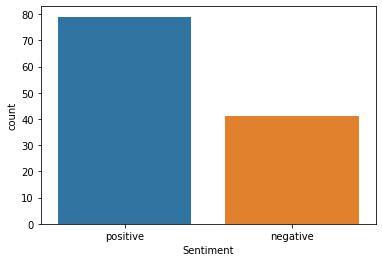

In [7]:
# Diagram of the train_data file with number of posts and negantive files
sns.countplot(x='Sentiment',data=train_data)

In [8]:
# remove tweets with empty sentiment column

train_data = train_data[train_data['Sentiment'] != ""]



In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         120 non-null    object
 1   Text       120 non-null    object
 2   Sentiment  120 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB


In [10]:


 #Function to clean tweets
 #Remove URLs
 #Remove usernames (mentions)
 #Remove special characters EXCEPT FROM :,)
 #Remove Numbers 



def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

     # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    
    
    
    
    return tweet



In [12]:
# Apply function to Text column with clean text
train_data['Text'] = train_data['Text'].apply(clean_tweets)


In [13]:
#Analyze the 1st 5 posts of train_data file after cleaning with Name of column and datatype!
train_data['Text'].head()

0    Who is ready for iPhone s and iPhone s Plus I ...
1    there are hacks on how to save heaps of batter...
2    Hi Rica Cunanan  ricacunanan Do u want to get ...
3    Hi Ariane Valentine  mainlyboredom Do u want t...
4    Hi eastsidecrazii  rthompson Do u want to get ...
Name: Text, dtype: object

In [14]:
# Function which directly tokenize the text data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
train_data['Text'].apply(tt.tokenize)

0      [Who, is, ready, for, iPhone, s, and, iPhone, ...
1      [there, are, hacks, on, how, to, save, heaps, ...
2      [Hi, Rica, Cunanan, ricacunanan, Do, u, want, ...
3      [Hi, Ariane, Valentine, mainlyboredom, Do, u, ...
4      [Hi, eastsidecrazii, rthompson, Do, u, want, t...
                             ...                        
115    [When, youre, sitting, there, waiting, for, th...
116                                          [Iphone, s]
117          [I, WANNA, iPHONE, TOO, I, HAVE, NO, PHONE]
118    [maybe, some, of, us, like, our, iPhone, Fives...
119    [Today, is, the, iPhone, S, release, date, May...
Name: Text, Length: 120, dtype: object

In [15]:
from nltk.stem import PorterStemmer   #Libraries for tokenize words
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [16]:
def tokenize(text):                    # funtion for tokenize words and analyze Text
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

In [17]:
# apply tokenize function
train_data['text'] = train_data['Text'].apply(tokenize)

In [18]:
# apply steming function
train_data['tokenized'] = train_data['text'].apply(stemming)

In [19]:
train_data.head()  #See the 1st 5 tokenize reults

,ID,Text,Sentiment,text,tokenized
0,P1,Who is ready for iPhone s and iPhone s Plus I ...,positive,"[Who, is, ready, for, iPhone, s, and, iPhone, ...","[who, is, readi, for, iphon, s, and, iphon, s,..."
1,P2,there are hacks on how to save heaps of batter...,positive,"[there, are, hacks, on, how, to, save, heaps, ...","[there, are, hack, on, how, to, save, heap, of..."
2,P3,Hi Rica Cunanan ricacunanan Do u want to get ...,positive,"[Hi, Rica, Cunanan, ricacunanan, Do, u, want, ...","[Hi, rica, cunanan, ricacunanan, Do, u, want, ..."
3,P4,Hi Ariane Valentine mainlyboredom Do u want t...,positive,"[Hi, Ariane, Valentine, mainlyboredom, Do, u, ...","[Hi, arian, valentin, mainlyboredom, Do, u, wa..."
4,P5,Hi eastsidecrazii rthompson Do u want to get ...,positive,"[Hi, eastsidecrazii, rthompson, Do, u, want, t...","[Hi, eastsidecrazii, rthompson, Do, u, want, t..."


In [20]:
words = Counter()                       # Words analyze  (5 most common) with count of them
for idx in train_data.index:
    words.update(train_data.loc[idx, "text"])

words.most_common(5)

[('iPhone', 98), ('my', 73), ('get', 65), ('Hi', 57), ('FREE', 57)]

In [21]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(5)

[('iPhone', 98), ('get', 65), ('Hi', 57), ('FREE', 57), ('check', 57)]

In [23]:
def word_list(processed_data): # wORDLIST FUNCTION FOR ANALYZE MOST COMMON WORDS WITH PURPOSE TO IDENTIFY OUR APP THE REAL SENTIMENT
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [24]:
word_list(train_data)    #TRAIN DATA INTO WORDLIST FOR ANALYZE

In [25]:
words = pd.read_csv("wordlist.csv") #CREATE WORDLIST CSV WITH THE MOST COMMON WORDS

In [26]:
import os
wordlist= []      #CREATE THE FILE WORDLIST
if os.path.isfile("wordlist.csv"):
    word_df = pd.read_csv("wordlist.csv")
    word_df = word_df[word_df["occurrences"] > 3]
    wordlist = list(word_df.loc[:, "word"])

label_column = ["label"]
columns = label_column + list(map(lambda w: w + "_bow",wordlist))
labels = []
rows = []
for idx in train_data.index:
    current_row = []
    
    # add label
    current_label = train_data.loc[idx, "Sentiment"]
    labels.append(current_label)
    current_row.append(current_label)

    # add bag-of-words
    tokens = set(train_data.loc[idx, "text"])
    for _, word in enumerate(wordlist):
        current_row.append(1 if word in tokens else 0)

    rows.append(current_row)

data_model = pd.DataFrame(rows, columns=columns)
data_labels = pd.Series(labels)


bow = data_model

In [27]:
import random    #Randomize the Texts
seed = 777
random.seed(seed)

In [28]:
 def log(x):
    #can be used to write to log file
     print(x)

In [29]:
def test_classifier(X_train, y_train, X_test, y_test, classifier):
    log("")
    log("---------------------------------------------------------")
    log("Testing " + str(type(classifier).__name__))
    now = time()
    list_of_labels = sorted(list(set(y_train)))
    model = classifier.fit(X_train, y_train)
    log("Learing time {0}s".format(time() - now))
    now = time()
    predictions = model.predict(X_test)
    log("Predicting time {0}s".format(time() - now))

    # Calculate Accuracy, Precision, recall computation
    
    precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
    
    log("=================== Results ===================")
    log("         Negative   Positive          ")
    log("F1       " +   str(f1))
    log("Precision" +   str(precision))
    log("Recall   " +   str(recall))
    log("Accuracy " +   str(accuracy))
    log("===============================================")

    return precision, recall, accuracy, f1
   
   


In [30]:

from sklearn.naive_bayes import BernoulliNB  #Print f1, Precision, Recall ,Accuracy Score got Negatives and Positives Posts
X_train, X_test, y_train, y_test = train_test_split(bow.iloc[:, 1:], bow['label'], test_size=0.3)
precision, recall, accuracy, f1 = test_classifier(X_train, y_train, X_test, y_test, BernoulliNB())


---------------------------------------------------------
Testing BernoulliNB
Learing time 0.0030260086059570312s
Predicting time 0.00084686279296875s
=================== Results ===================
         Negative   Positive          
F1       [0.72727273 0.76923077]
Precision[0.57142857 1.        ]
Recall   [1.    0.625]
Accuracy 0.75


In [34]:
# Give text input for testing your post!
# After clean tweet and print it!

y= input("Type your post for analysis:")
x=clean_tweets(y)
print(x)



Type your post for analysis:Who is ready for iPhone 6s and iPhone 6s Plus? :)
Who is ready for iPhone s and iPhone s Plus 


In [35]:
# Using textblob library for data analysis 
# After sentiment and polarity for calculate the emotion of the post and print it for testing!
text= TextBlob(y)


z = text.sentiment.polarity

print (z)





0.35


In [36]:
# Using if statement for printing if it is positive or negative!

if z==0: 
    print("Neutral")
elif z<0:
    print("Negative")
else:
    print("Positive")

Positive
